#Download dataset from Kaggle

> Indented block



In [ ]:
!pip install opendatasets
import opendatasets as od


In [ ]:
od.download("https://www.kaggle.com/datasets/camnugent/california-housing-prices")

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


#Import necessary libraries and load data

In [ ]:
# Step 0: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler,RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

#Discover and understand the dataset

In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/california-housing-prices/housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Display summary statistics
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<ipython-input-12-8640adfff2d3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['longitude'])


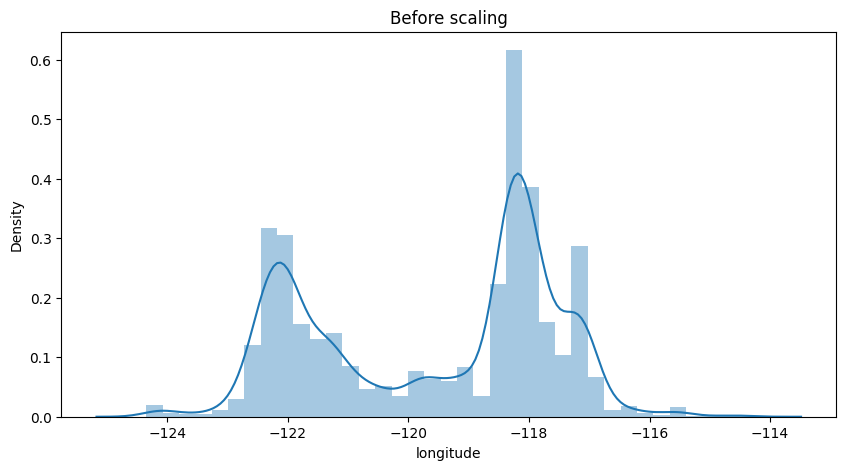

<ipython-input-12-8640adfff2d3>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['longitude'])


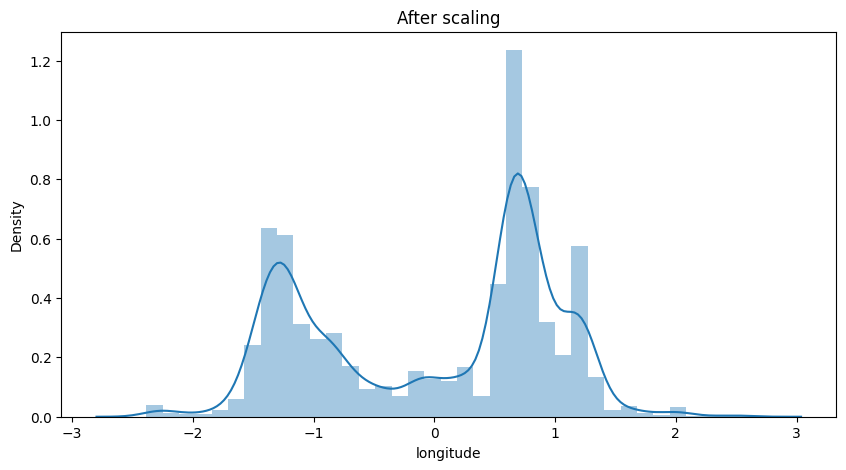

In [ ]:
# prompt: visualize scaling of the dataset

# Visualize scaling of the dataset
plt.figure(figsize=(10,5))
plt.title('Before scaling')
sns.distplot(dataset['longitude'])
plt.xlabel('longitude')
plt.ylabel('Density')
plt.show()

scaler = StandardScaler()
dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']] = scaler.fit_transform(dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']])

plt.figure(figsize=(10,5))
plt.title('After scaling')
sns.distplot(dataset['longitude'])
plt.xlabel('longitude')
plt.ylabel('Density')
plt.show()


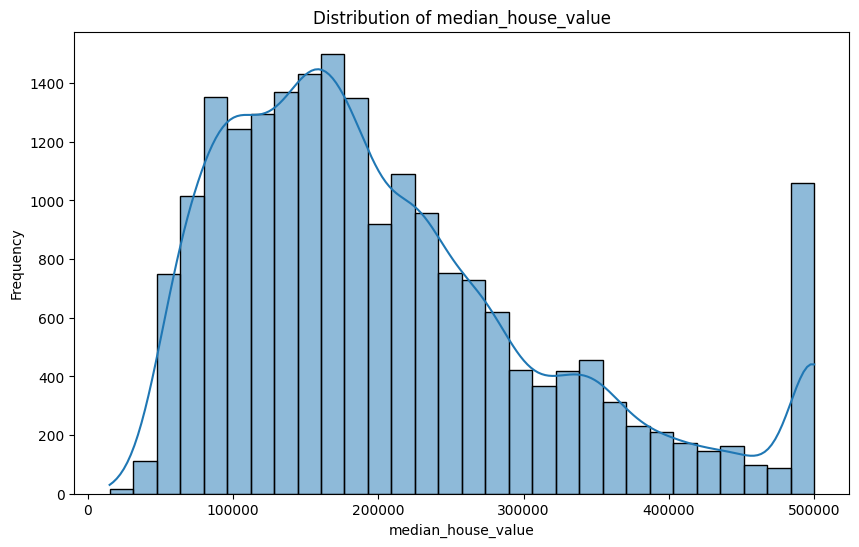

In [ ]:
#Distribution of median_house_value
plt.figure(figsize=(10, 6))
sns.histplot(dataset['median_house_value'], bins=30, kde=True)
plt.title('Distribution of median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.show()


<Axes: >

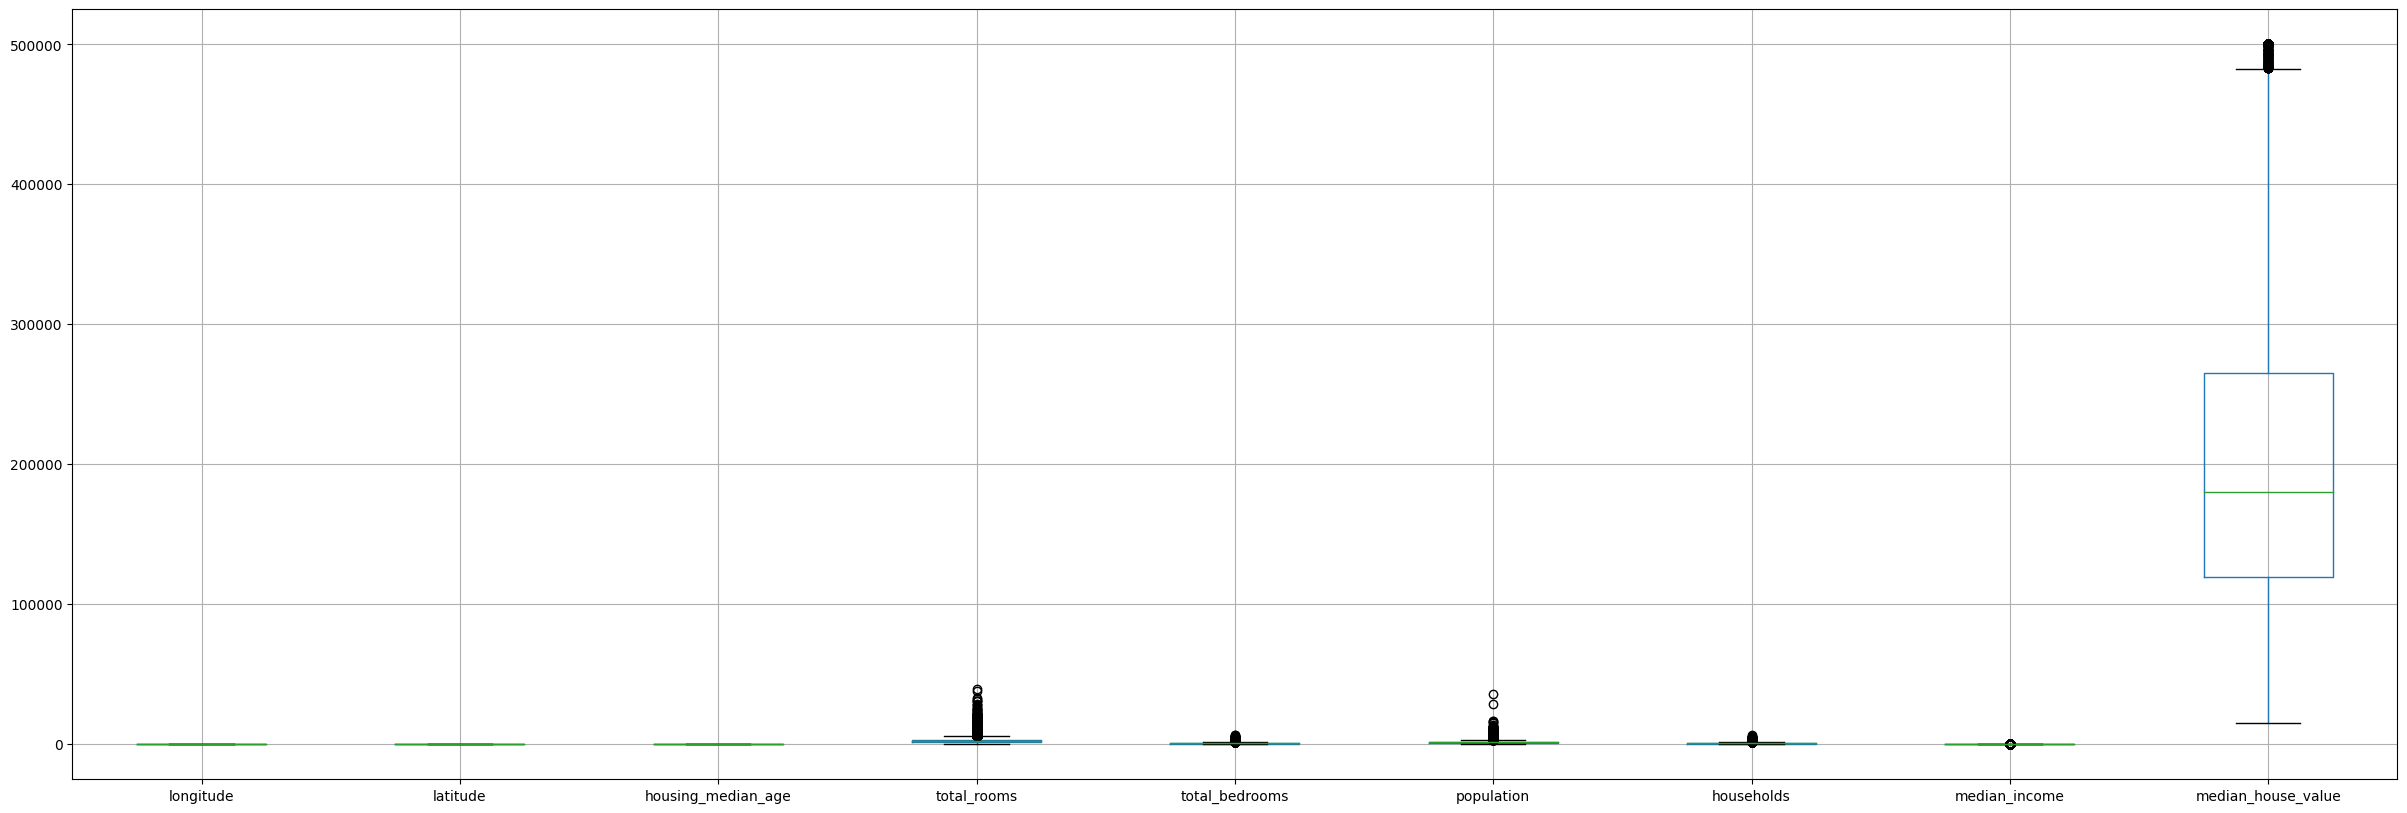

In [ ]:
# prompt: show boxplot for all featuers for showing outliers

dataset.boxplot(figsize=(30,10))

Text(0, 0.5, 'median_house_value')

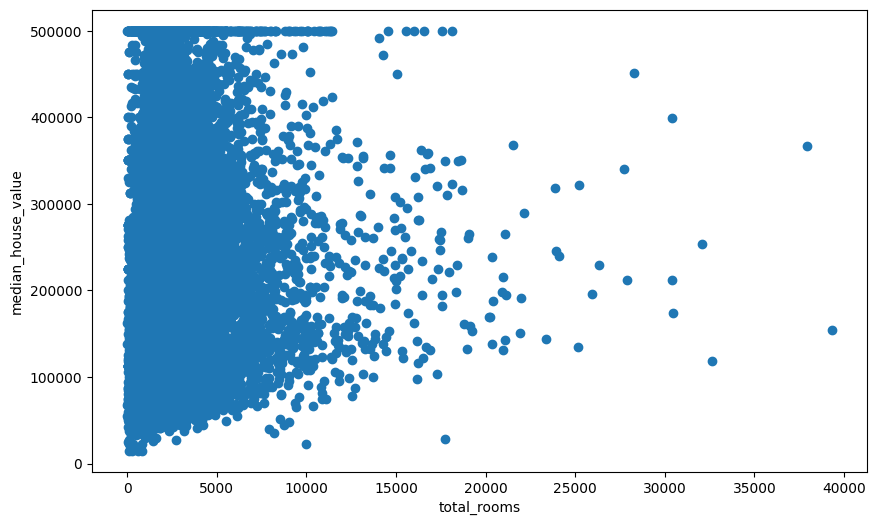

In [ ]:
# visualize scaling problem
plt.figure(figsize=(10, 6))
fig = plt.scatter(dataset.total_rooms, dataset.median_house_value)
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')

#PreProcessing

##chech null values

In [ ]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Fill missing values with the mean for numerical columns
dataset.fillna(dataset.mean(), inplace=True)

<ipython-input-331-feed1601fcaa>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean(), inplace=True)


In [ ]:
# For categorical columns, fill missing values with mode 'iloc[0] to select first row '
dataset.fillna(dataset.mode().iloc[0], inplace=True)

In [ ]:
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Handle Outliers

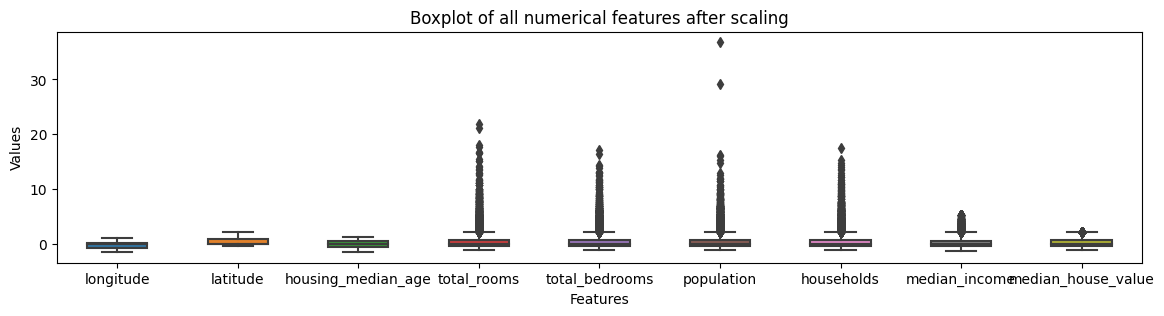

In [ ]:
#solve outliers using robust method

# Assuming you have your dataset loaded into the 'dataset' variable

# List of numerical columns in the dataset
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the dataset
scaler.fit(dataset[numerical_columns])

# Transform the dataset using the scaler
dataset[numerical_columns] = scaler.transform(dataset[numerical_columns])

# Check the distribution of the numerical features after scaling
plt.figure(figsize=(14, 3))
sns.boxplot(data=dataset, orient='v', width=0.5)
plt.title('Boxplot of all numerical features after scaling')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


In [ ]:
print(dataset.shape)

(20640, 10)


In [ ]:
# solve dataset outliers

# Create an empty set to store indices of rows with outliers
outlier_rows = set()

# Iterate over numerical columns to identify rows with outliers
for column in numerical_columns:
    # Identify outliers using z-score
    z_score = np.abs(dataset[column] - dataset[column].mean()) / dataset[column].std()
    outliers = np.where(z_score > 3)

    # Add indices of rows with outliers to the set
    outlier_rows.update(outliers[0])

# Calculate the total number of rows with outliers
total_rows_with_outliers = len(outlier_rows)

# Print the total number of rows with outliers
print(f"Total rows with outliers: {total_rows_with_outliers}")

# Remove rows with outliers from the dataset
dataset = dataset.drop(outlier_rows, axis=0)

# Print the shape of the dataset after removing outliers
print(dataset.shape)


Total rows with outliers: 894
(19746, 10)


##Endocding

In [ ]:
#select categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns
# Apply LabelEncoder to each categorical column 'object=>numeric'
label_encoder = LabelEncoder()
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Display the modified DataFrame
print("DataFrame after Label Encoding:")
print(dataset)

DataFrame after Label Encoding:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -0.986807  0.957672            0.631579    -0.733422       -0.871795   
1      -0.984169  0.952381           -0.421053     2.924276        1.911681   
2      -0.989446  0.949735            1.210526    -0.388178       -0.698006   
3      -0.992084  0.949735            1.210526    -0.501691       -0.569801   
4      -0.992084  0.949735            1.210526    -0.294074       -0.441595   
...          ...       ...                 ...          ...             ...   
20635  -0.686016  1.380952           -0.210526    -0.271725       -0.173789   
20636  -0.717678  1.383598           -0.578947    -0.841053       -0.811966   
20637  -0.720317  1.367725           -0.631579     0.074695        0.142450   
20638  -0.746702  1.367725           -0.578947    -0.157036       -0.074074   
20639  -0.725594  1.351852           -0.684211     0.387002        0.515670   

       population  

##Scalling using StandardScaler

In [ ]:
# Create a StandardScaler object
sc = StandardScaler()

# Fit and transform the dataset
scaled_data = sc.fit_transform(dataset)
print(scaled_data)

[[-1.32783522  1.05254828  0.98214266 ...  2.34476576  2.12963148
   1.2910888 ]
 [-1.32284391  1.04318455 -0.60701891 ...  2.33223796  1.31415614
   1.2910888 ]
 [-1.33282653  1.03850269  1.85618152 ...  1.7826994   1.25869341
   1.2910888 ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -1.14259331 -0.99274649
  -0.11673923]
 [-0.87362627  1.77823747 -0.84539315 ... -1.05458292 -1.05860847
  -0.11673923]
 [-0.83369581  1.75014627 -1.00430931 ... -0.78012947 -1.01787803
  -0.11673923]]


Text(0, 0.5, 'median_house_value')

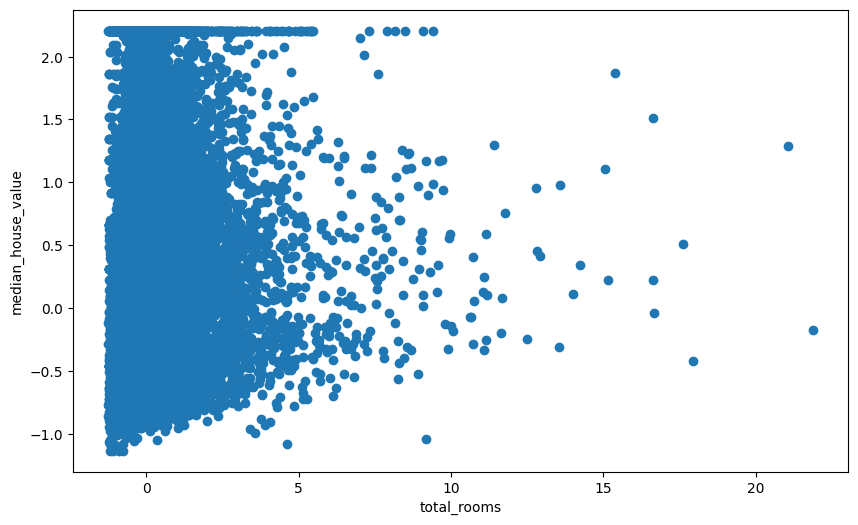

In [23]:
# visualize scaling problem
plt.figure(figsize=(10, 6))
fig = plt.scatter(dataset.total_rooms, dataset.median_house_value)
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')

##corrolation

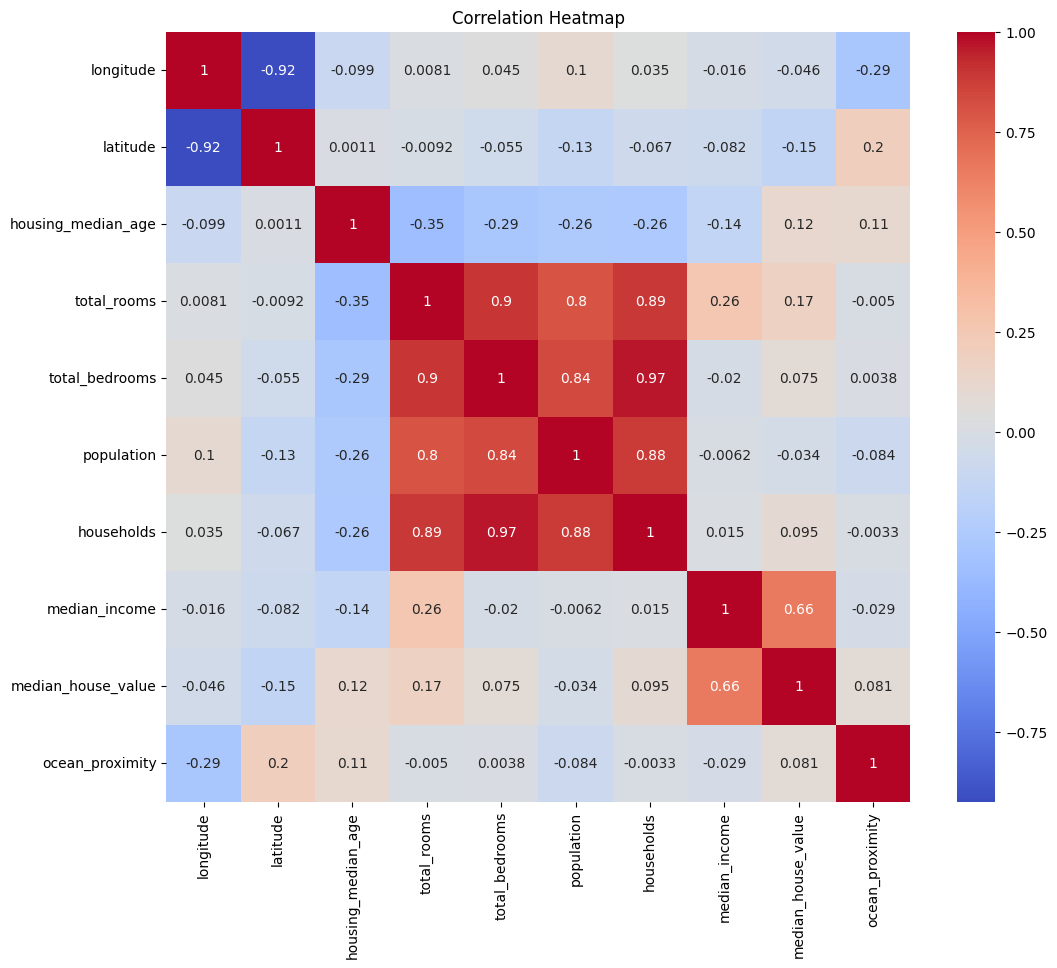

In [ ]:
# prompt: plot correlations heatmap (features that impact on median_house_value	 positively or negatively)

plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Split & Train & Test dataset

In [ ]:
X = dataset.drop('median_house_value', axis=1) # all data features except median_house_value
Y = dataset['median_house_value']              # put median_house_value (target) in y

x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print("X_train shape:",x_train.shape)
print("X_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (15796, 9)
X_test shape: (3950, 9)
y_train shape: (15796,)
y_test shape: (3950,)


# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

# Model 2: Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)
y_pred_rf = random_forest_model.predict(x_test)

In [ ]:
# Define a threshold
threshold = 1

# Calculate the percentage of predictions within the threshold
within_threshold = np.abs(y_test - y_pred_linear) <= threshold
accuracy_percentage = (np.sum(within_threshold) / len(y_test)) * 100

print(f"Linear Regression Accuracy Percentage within {threshold}: {accuracy_percentage}%")


Linear Regression Accuracy Percentage within 1: 95.67088607594937%


In [ ]:

# Define a threshold
threshold = 1

# Calculate the percentage of predictions within the threshold
within_threshold = np.abs(y_test - y_pred_rf) <= threshold
accuracy_percentage = (np.sum(within_threshold) / len(y_test)) * 100

print(f"Random Forest Regressor Accuracy Percentage within {threshold}: {accuracy_percentage}%")


Random Forest Regressor Accuracy Percentage within 1: 97.87341772151899%


In [ ]:
# Evaluate Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)  #average (|error|Power 2)
mse_linear = mean_squared_error(y_test, y_pred_linear)     # square root MAe

print("Linear Regression Metrics:")
print(f"R-squared: {r2_linear}")
print(f"Mean Absolute Error: {mae_linear}")
print(f"Mean Squared Error: {mse_linear}")


Linear Regression Metrics:
R-squared: 0.6410091174413762
Mean Absolute Error: 0.33837825146924705
Mean Squared Error: 0.20693776706798206


In [ ]:
# Evaluate Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\nRandom Forest Regression Metrics:")
print(f"R-squared: {r2_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")


Random Forest Regression Metrics:
R-squared: 0.8092935035265645
Mean Absolute Error: 0.21913422117554707
Mean Squared Error: 0.10993141737834007


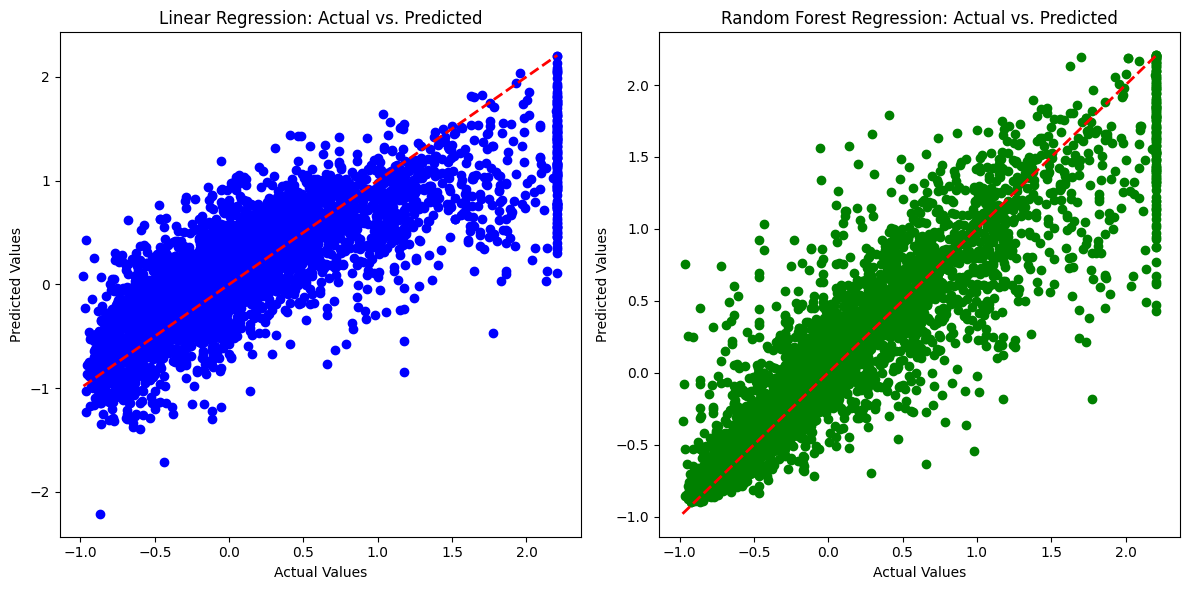

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Random Forest Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [ ]:
# # Visualizing the predicted results versus actual results  // line regration to predict missing values
# ##x-axis => x-test => features
# ##blue points => y-test => target
# ##red points => y-pred
# plt.scatter(x_test, y_test, color='blue', label='Actual')
# plt.scatter(x_test, y_pred, color='red', label='Predicted')
# plt.plot(x_test, y_pred, color='green', linewidth=2, label='Regression Line')
# plt.title('Linear Regression - Predicted vs. Actual')
# plt.xlabel('X (Feature)')
# plt.ylabel('y (Target)')
# plt.legend()            # to distinguish between 'Actual,' 'Predicted,' and 'Regression Line.'
# plt.show()
